<a href="https://colab.research.google.com/github/Hardik74658/Internship_Project_Herbalife_Neutrition_Sales_Analysis_2022-2024/blob/main/P_%26_S_HYPOTHESIS_TESTING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

P & S / HYPOTHESIS TESTING


1> Calculate mean, median, mode, standard deviation, and variance for amount, discount, and MRP.

2> Plot histograms and boxplots for amount, discount, and MRP to understand their distributions.

3> Calculate the probability of an order being canceled. This can be done by dividing the number of canceled orders by the total number of orders.

4> Calculate the probability of an order being canceled given different conditions, such as high discount rates or specific states.

5> Compute the correlation matrix to identify relationships between amount, discount, MRP, and quantity.

6> Use a chi-square test to examine the relationship between categorical variables, such as state and order cancellation status.

7> Conduct an ANOVA to determine if there are significant differences in the average order amount across different states or cities.

8> Analyze trends in the order data over time by plotting orderd_date against amount.

9> Perform Recency, Frequency, Monetary (RFM) analysis to segment customers based on their purchasing behavior.

# **All Imports**

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel,ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

import datetime as dt

In [ ]:
df_order = pd.read_csv("Orders.csv")
df_allproduct = pd.read_csv("all_products.csv")
df_allcoaches = pd.read_csv("All_Coaches.csv")
df_ordereditems = pd.read_csv("OrderedItems.csv")
df_cancelledorder = pd.read_csv("CancelledOrders.csv")
df_temp = pd.read_csv("temp.csv")

In [ ]:
df_order = pd.read_csv("Orders.csv")


# **Data Pre-processing**

In [ ]:

# per-processing of sku

df_ordereditems['SKU'] = (df_ordereditems['SKU']).astype(str).apply(lambda x: x.zfill(4))
df_ordereditems['SKU'] = (df_ordereditems['SKU']).str.upper()

df_allproduct['SKU'] = df_allproduct['SKU'].astype(str).apply(lambda x: x.zfill(4))
df_allproduct['SKU'] = df_allproduct['SKU'].str.upper()

df_cancelledorder['SKU'] = df_cancelledorder['SKU'].astype(str).apply(lambda x: x.zfill(4))
df_cancelledorder['SKU'] = df_cancelledorder['SKU'].str.upper()

df_temp['SKU'] = df_temp['SKU'].astype(str).apply(lambda x: x.zfill(4))
df_temp['SKU'] = df_temp['SKU'].str.upper()

In [ ]:
df_temp[['Amount Paid']]
# df_ordereditems
# df_allproduct
# df_allcoaches
# df_cancelledorder

,Amount Paid
0,2278.58
1,2278.58
2,3095.73
3,3095.73
4,3095.73
...,...
1934,6608.00
1935,3416.34
1936,3416.34
1937,5177.49


#**Analysis**

In [ ]:
all_data_with_mrps = df_ordereditems.merge(df_allproduct,how='inner',left_on='SKU',right_on="SKU")

In [ ]:
all_data_with_mrps

,Order_Number,SKU,Quantity,Product_Name,MRP
0,3I21770826,1295,2,Afresh Energy Drink Mix - Lemon - 50 gms,885
1,3I22077008,1295,2,Afresh Energy Drink Mix - Lemon - 50 gms,885
2,3I22571643,1295,1,Afresh Energy Drink Mix - Lemon - 50 gms,885
3,3I23348789,1295,1,Afresh Energy Drink Mix - Lemon - 50 gms,885
4,3I23629823,1295,-1,Afresh Energy Drink Mix - Lemon - 50 gms,885
...,...,...,...,...,...
1888,3I51133226,046K,1,HN-Skin Booster- Orange - 10 gms *30 Sachets,4266
1889,3I58746331,046K,1,HN-Skin Booster- Orange - 10 gms *30 Sachets,4266
1890,3I53570260,115K,1,vritilife Immune Health - 60 Tablets,1668
1891,3I54691103,115K,1,vritilife Immune Health - 60 Tablets,1668


# **1> Calculate mean, median, mode, standard deviation, and variance for amount, discount, and MRP.**

In [ ]:
# Calculate mean
mean_amount = df_order['Amount_Paid'].mean()
mean_discount = df_order['Discount'].mean()
mean_mrp = all_data_with_mrps['MRP'].mean()

# Calculate median
median_amount = df_order['Amount_Paid'].median()
median_discount = df_order['Discount'].median()
median_mrp = all_data_with_mrps['MRP'].median()

# Calculate mode
mode_amount = df_order['Amount_Paid'].mode()[0]  # mode() returns a Series
mode_discount = df_order['Discount'].mode()[0]
mode_mrp = all_data_with_mrps['MRP'].mode()[0]

# Calculate standard deviation
std_amount = df_order['Amount_Paid'].std()
std_discount = df_order['Discount'].std()
std_mrp = all_data_with_mrps['MRP'].std()

# Calculate variance
var_amount = df_order['Amount_Paid'].var()
var_discount = df_order['Discount'].var()
var_mrp = all_data_with_mrps['MRP'].var()

# Print the results
print(f"Mean of amount: {round(mean_amount,2)}")
print(f"Median of amount: {round(median_amount,2)}")
print(f"Mode of amount: {round(mode_amount,2)}")
print(f"Standard Deviation of amount: {round(std_amount,2)}")
print(f"Variance of amount: {round(var_amount,2)}\n")

print(f"Mean of discount: {round(mean_discount,2)}")
print(f"Median of discount: {round(median_discount,2)}")
print(f"Mode of discount: {round(mode_discount,2)}")
print(f"Standard Deviation of discount: {round(std_discount,2)}")
print(f"Variance of discount: {round(var_discount,2)}\n")

print(f"Mean of MRP: {round(mean_mrp,2)}")
print(f"Median of MRP: {round(median_mrp,2)}")
print(f"Mode of MRP: {round(mode_mrp,2)}")
print(f"Standard Deviation of MRP: {round(std_mrp,2)}")
print(f"Variance of MRP: {round(var_mrp,2)}")


Mean of amount: 4338.4
Median of amount: 2678.44
Mode of amount: 1952.31
Standard Deviation of amount: 4305.12
Variance of amount: 18534057.78

Mean of discount: 0.42
Median of discount: 0.5
Mode of discount: 0.5
Standard Deviation of discount: 0.11
Variance of discount: 0.01

Mean of MRP: 1699.67
Median of MRP: 1413.0
Mode of MRP: 2378
Standard Deviation of MRP: 851.11
Variance of MRP: 724382.84


# **2> Plot histograms and boxplots for amount, discount, and MRP to understand their distributions.**

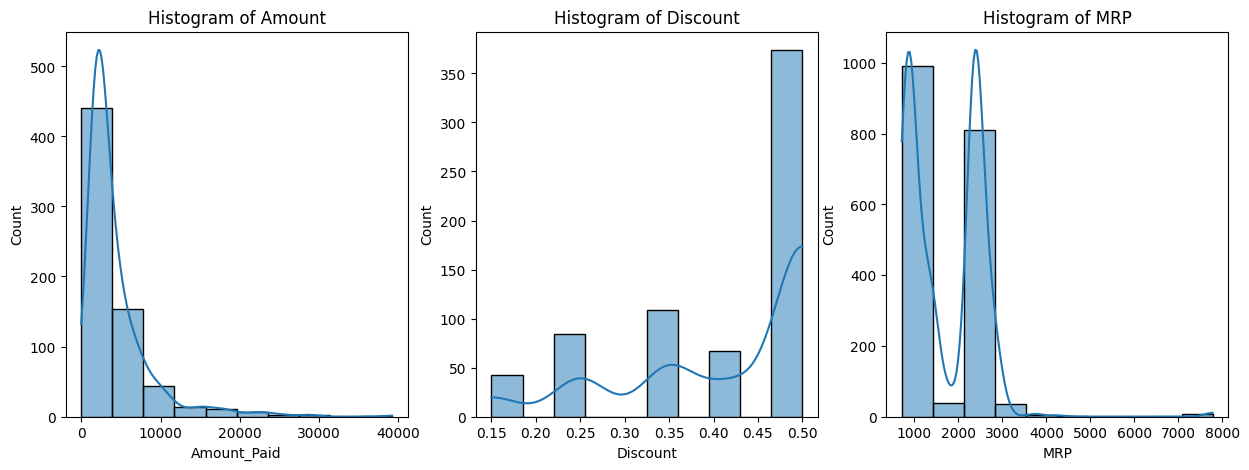

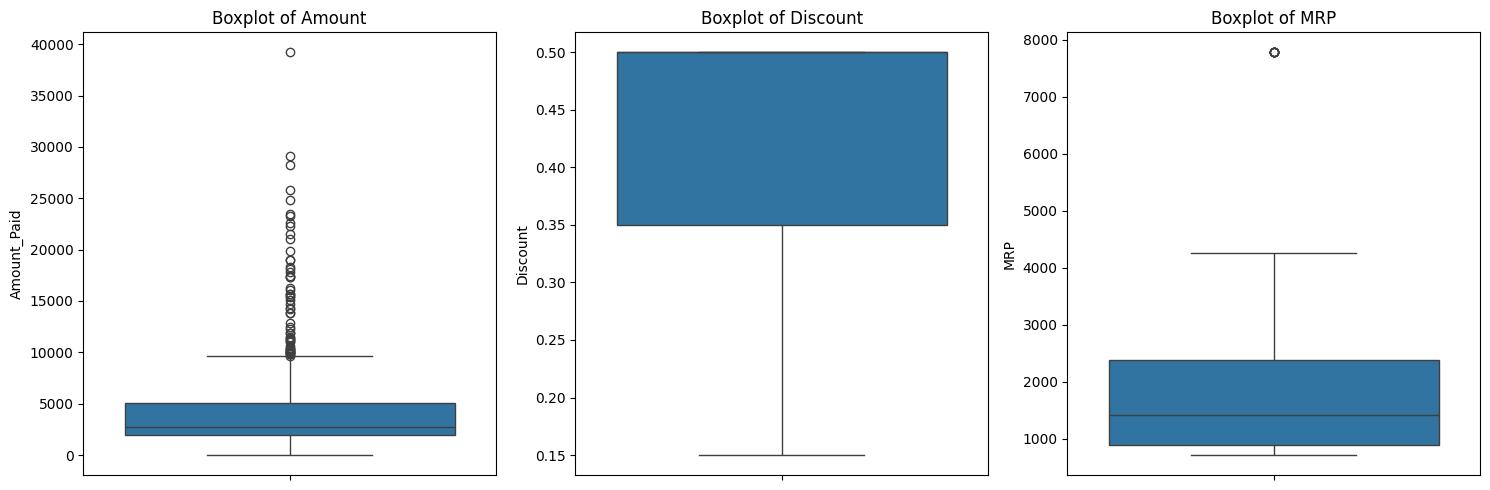

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_order['Amount_Paid'], bins=10, kde=True)
plt.title('Histogram of Amount')

plt.subplot(1, 3, 2)
sns.histplot(df_order['Discount'], bins=10, kde=True)
plt.title('Histogram of Discount')

plt.subplot(1, 3, 3)
sns.histplot(all_data_with_mrps['MRP'], bins=10, kde=True)
plt.title('Histogram of MRP')

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df_order['Amount_Paid'])
plt.title('Boxplot of Amount')

plt.subplot(1, 3, 2)
sns.boxplot(y=df_order['Discount'])
plt.title('Boxplot of Discount')

plt.subplot(1, 3, 3)
sns.boxplot(y=all_data_with_mrps['MRP'])
plt.title('Boxplot of MRP')

plt.tight_layout()
plt.show()

# **3> Calculate the probability of an order being canceled. This can be done by dividing the number of canceled orders by the total number of orders.**

In [ ]:
# Total number of orders
total_orders = df_ordereditems.shape[0] + df_cancelledorder.shape[0]

# Number of canceled orders
canceled_orders = df_cancelledorder.shape[0]

# Probability of an order being canceled
probability_canceled = canceled_orders / total_orders

print(f"Total number of orders: {total_orders}")
print(f"Number of canceled orders: {canceled_orders}")
print(f"Probability of an order being canceled: {probability_canceled:.2f}")


Total number of orders: 1939
Number of canceled orders: 36
Probability of an order being canceled: 0.02


# **4> Calculate the probability of an order being canceled given different conditions, such as high discount rates or specific states.**

In [ ]:
all_high_discount_orders = df_order['Discount'] >= 0.35
high_discount_condition = df_cancelledorder['Discount'] >= 0.35

# Total number of orders with high discount rates
canceled_high_discount_orders = len(high_discount_condition.value_counts())

total_high_discount_orders = all_high_discount_orders.shape[0] + canceled_high_discount_orders

# Probability of an order being canceled with high discount rates
probability_canceled_high_discount = canceled_high_discount_orders / total_high_discount_orders

print(f"Total number of orders with high discount rates: {total_high_discount_orders}")
print(f"Number of canceled orders with high discount rates: {canceled_high_discount_orders}")
print(f"Probability of an order being canceled with high discount rates: {probability_canceled_high_discount:}")


Total number of orders with high discount rates: 678
Number of canceled orders with high discount rates: 2
Probability of an order being canceled with high discount rates: 0.0029498525073746312


In [ ]:

state_condition = df_order['State'] == 'GUJARAT'
canceled_state_condition = df_cancelledorder['State'] == 'GUJARAT'


state_df = df_order[state_condition]
canceled_state_df = df_cancelledorder[canceled_state_condition]

# Total number of orders in the specific state
total_canceled_state_order = len(canceled_state_df['Order_Number'].value_counts())
total_state_orders = state_df.shape[0] + total_canceled_state_order


# Probability of an order being canceled in the specific state
probability_canceled_state = total_canceled_state_order / total_state_orders

print(f"Total number of orders in CA: {total_state_orders}")
print(f"Number of canceled orders in CA: {total_canceled_state_order}")
print(f"Probability of an order being canceled in CA: {probability_canceled_state:.2f}")


Total number of orders in CA: 675
Number of canceled orders in CA: 17
Probability of an order being canceled in CA: 0.03


# **5> Compute the correlation matrix to identify relationships between amount, discount, MRP, and quantity.**

[[ 1.         -0.10518435]
 [-0.10518435  1.        ]]


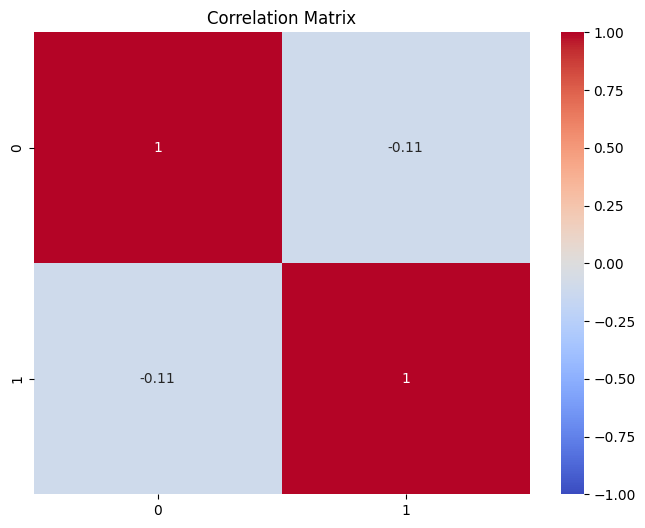

In [ ]:
correlation_matrix = np.corrcoef(all_data_with_mrps['Quantity'], all_data_with_mrps['MRP'])

# Print the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

[[ 1.         -0.16661603]
 [-0.16661603  1.        ]]


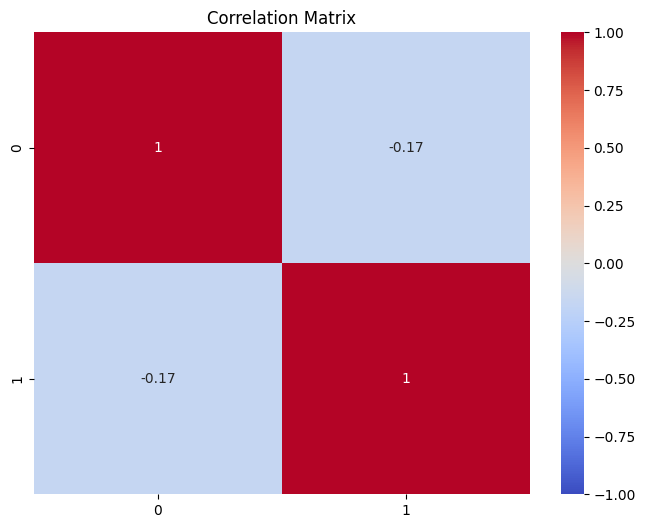

In [ ]:

correlation_matrix = np.corrcoef(df_order['Amount_Paid'], df_order['Discount'])

# Print the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

             Amount Paid  Quantity  Discount
Amount Paid     1.000000  0.272719 -0.070264
Quantity        0.272719  1.000000  0.059102
Discount       -0.070264  0.059102  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

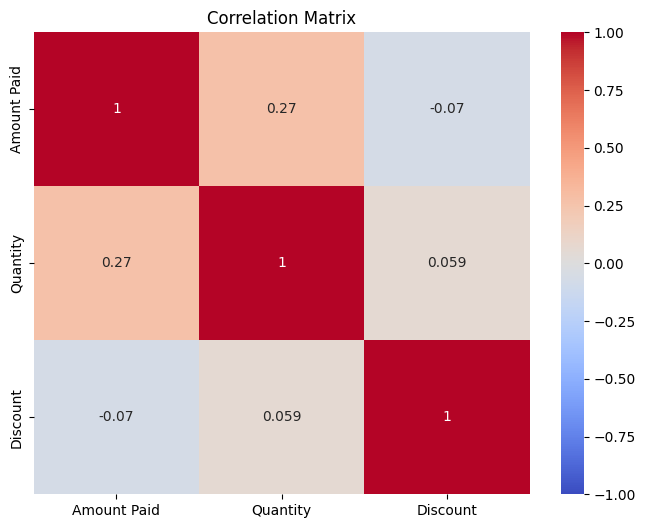

In [ ]:
correlation_matrix = df_temp[['Amount Paid','Quantity','Discount']].corr()
# Print the correlation matrix
print(correlation_matrix)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')


In [ ]:
data = {
    'amount_paid': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'quantity': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'discount': [5, 10, 15, 20, 5, 10, 15, 20, 5, 10]
}

df = pd.DataFrame(data)

In [ ]:
df

,amount_paid,quantity,discount
0,100,1,5
1,200,2,10
2,300,3,15
3,400,4,20
4,500,5,5
5,600,6,10
6,700,7,15
7,800,8,20
8,900,9,5
9,1000,10,10


# **6> Use a chi-square test to examine the relationship between categorical variables, such as state and order cancellation status.**

In [ ]:
state_status = pd.crosstab(index=df_temp["State"],columns=df_temp["Order Status"])
state_status

Order Status,CANCELLED,ORDER COMPLETE
State,,
GUJARAT,36,1853
HARYANA,0,4
JHARKHAND,0,1
KARNATAKA,0,3
KERALA,0,12
MAHARASHTRA,0,25
ON,0,1
PRADESH,0,4


In [ ]:
H0 = "State And Order Cancellation are not related."
Ha = "State And Order Cancellation are related."

In [ ]:
chi2_contingency(state_status)

Chi2ContingencyResult(statistic=0.9709113274935484, pvalue=0.9952842276351508, dof=7, expected_freq=array([[3.50716864e+01, 1.85392831e+03],
       [7.42650851e-02, 3.92573491e+00],
       [1.85662713e-02, 9.81433729e-01],
       [5.56988138e-02, 2.94430119e+00],
       [2.22795255e-01, 1.17772047e+01],
       [4.64156782e-01, 2.45358432e+01],
       [1.85662713e-02, 9.81433729e-01],
       [7.42650851e-02, 3.92573491e+00]]))

# **7> Conduct an ANOVA to determine if there are significant differences in the average order amount across different states or cities.**

In [ ]:
h0 = "Amount paid & state are not associated"
ha = "Amount paid & state are associated"
alpha = 0.05


gj = df_order[df_order["State"]=="GUJARAT"]
hr = df_order[df_order["State"]=="HARYANA"]
jh = df_order[df_order["State"]=="JHARKHAND"]
ka = df_order[df_order["State"]=="KARNATAKA"]
ke = df_order[df_order["State"]=="KERALA"]

mh = df_order[df_order["State"]=="MAHARASHTRA"]
on = df_order[df_order["State"]=="ON"]
pr =  df_order[df_order["State"]=="PRADESH"]

f, p = f_oneway(gj['Amount_Paid'],hr['Amount_Paid'],jh['Amount_Paid'],ka['Amount_Paid'],ke['Amount_Paid'],mh['Amount_Paid'],on['Amount_Paid'],pr['Amount_Paid'])
print("p-value =", p)
if p < alpha:
  print("Reject H0 and hence,")
  print(ha)
else:
  print("Failed to reject H0 and hence,")
  print(h0)

p-value = 0.02644901142918897
Reject H0 and hence,
Amount paid & state are associated


# **8> Analyze trends in the order data over time by plotting orderd_date against amount.**

In [ ]:
df_order["Order_Date"] = pd.to_datetime(df_order['Order_Date'])

In [ ]:
df_order['month'] = df_order['Order_Date'].dt.month

In [ ]:
groupby_month_year = df_order.groupby(['year','month'])

In [ ]:
groups_list = list(groupby_month_year.groups.keys())


[(2022, 1),
 (2022, 2),
 (2022, 3),
 (2022, 4),
 (2022, 5),
 (2022, 6),
 (2022, 7),
 (2022, 8),
 (2022, 9),
 (2022, 10),
 (2022, 11),
 (2022, 12),
 (2023, 1),
 (2023, 2),
 (2023, 3),
 (2023, 4),
 (2023, 5),
 (2023, 6),
 (2023, 7),
 (2023, 8),
 (2023, 9),
 (2023, 10),
 (2023, 11),
 (2023, 12),
 (2024, 1),
 (2024, 2),
 (2024, 3),
 (2024, 4),
 (2024, 5),
 (2024, 6)]

2022 - 1


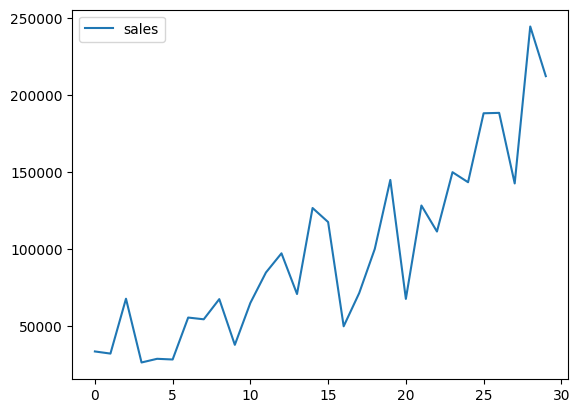

In [ ]:
groupby_month_year.get_group((2024,1))
dict_1 ={
    "month":[],
    "sales":[]
}
def total_sales(year_month):
    dict_1["sales"].append(sum(groupby_month_year.get_group(year_month)["Amount_Paid"]))
    dict_1["month"].append(year_month)

for group in groups_list:
  total_sales(group)

df= pd.DataFrame(dict_1)
df

sns.lineplot(df)

def name(group):
  name = group[0].str.concat("-").co



print(groups_list[0][0],'-',groups_list[0][1])

In [ ]:
all_data_with_mrps2 = df_temp.merge(df_allproduct,how='inner',left_on='SKU',right_on="SKU")
all_data_with_mrps2

,Order Number,Delivery Charges,Order Date,Order Status,Purchased By,Customer Name,City,State,Pincode,Contact Number,Amount Paid,Discount,Quantity,Item,SKU,Product_Name,MRP
0,3I21770826,0,08-01-2022,ORDER COMPLETE,HETALBEN ALAKHKUMAR PANDYA,ALAKH PANDYA,AHMEDABAD,GUJARAT,380009,9428128473,2278.58,0.50,2,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
1,3I22077008,0,19-01-2022,ORDER COMPLETE,HETALBEN ALAKHKUMAR PANDYA,ALAKH PANDYA,AHMEDABAD,GUJARAT,380009,9428128473,6110.04,0.50,2,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
2,3I22571643,100,02-02-2022,ORDER COMPLETE,HETALBEN ALAKHKUMAR PANDYA,BHUMI RAVIDRAKUMAR SHARMA,GANDHI NAGAR,GUJARAT,382007,7405666780,3970.11,0.50,1,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
3,3I23348789,100,28-02-2022,ORDER COMPLETE,RAVINDRAKUMAR SHARMA,RAVINDRA SHARMA,GANDHI NAGAR,GUJARAT,382007,7405666780,5834.80,0.15,1,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
4,3I23629823,0,07-03-2022,ORDER COMPLETE,RAJENDRAKUMAR GIRISHCHANDRA BHATTJI,RAJENDRA BHATTJI,AHMEDABAD,GUJARAT,380018,9624166552,19837.57,0.42,-1,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924,3I58708686,0,30-05-2024,CANCELLED,DHUMMAD ANIRUDDHSINH,ANIRUDDHSINH DHUMMAD,AHMEDABAD,GUJARAT,380059,7046306809,0.00,0.35,0,HN-SKIN BOOSTER COLLAGEN POWDER WITH VITAMINS ...,046K,HN-Skin Booster- Orange - 10 gms *30 Sachets,4266
1925,3I58746331,0,30-05-2024,ORDER COMPLETE,DHUMMAD ANIRUDDHSINH,ANIRUDDHSINH DHUMMAD,AHMEDABAD,GUJARAT,380059,7046306809,9640.54,0.35,1,HN-SKIN BOOSTER COLLAGEN POWDER WITH VITAMINS ...,046K,HN-Skin Booster- Orange - 10 gms *30 Sachets,4266
1926,3I53570260,0,05-02-2024,ORDER COMPLETE,HETALBEN ALAKHKUMAR PANDYA,ALAKH PANDYA,AHMEDABAD,GUJARAT,380050,9428128473,11022.38,0.50,1,VRITILIFE IMMUNE HEALTH,115K,vritilife Immune Health - 60 Tablets,1668
1927,3I54691103,0,29-02-2024,ORDER COMPLETE,HETALBEN ALAKHKUMAR PANDYA,ALAKH PANDYA,AHMEDABAD,GUJARAT,380050,9428128473,6479.97,0.50,1,VRITILIFE IMMUNE HEALTH,115K,vritilife Immune Health - 60 Tablets,1668


# **9> Perform Recency, Frequency, Monetary (RFM) analysis to segment customers based on their purchasing behavior.**

In [ ]:
all_data_with_mrps2

,Order Number,Delivery Charges,Order Date,Order Status,Purchased By,Customer Name,City,State,Pincode,Contact Number,Amount Paid,Discount,Quantity,Item,SKU,Product_Name,MRP
0,3I21770826,0,2022-01-08,ORDER COMPLETE,HETALBEN ALAKHKUMAR PANDYA,ALAKH PANDYA,AHMEDABAD,GUJARAT,380009,9428128473,2278.58,0.50,2,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
1,3I22077008,0,2022-01-19,ORDER COMPLETE,HETALBEN ALAKHKUMAR PANDYA,ALAKH PANDYA,AHMEDABAD,GUJARAT,380009,9428128473,6110.04,0.50,2,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
2,3I22571643,100,2022-02-02,ORDER COMPLETE,HETALBEN ALAKHKUMAR PANDYA,BHUMI RAVIDRAKUMAR SHARMA,GANDHI NAGAR,GUJARAT,382007,7405666780,3970.11,0.50,1,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
3,3I23348789,100,2022-02-28,ORDER COMPLETE,RAVINDRAKUMAR SHARMA,RAVINDRA SHARMA,GANDHI NAGAR,GUJARAT,382007,7405666780,5834.80,0.15,1,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
4,3I23629823,0,2022-03-07,ORDER COMPLETE,RAJENDRAKUMAR GIRISHCHANDRA BHATTJI,RAJENDRA BHATTJI,AHMEDABAD,GUJARAT,380018,9624166552,19837.57,0.42,-1,AFRESH ENERGY DRINK MIX-LEMON,1295,Afresh Energy Drink Mix - Lemon - 50 gms,885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1340,3I59253882,0,2024-06-08,ORDER COMPLETE,SONALBEN VASAVA,SONALBEN VASAVA,BHARUCH,GUJARAT,393001,9978310066,11911.22,0.35,3,SIMPLY PROBIOTIC,025K,Simply Probiotic - 1 gms *30 Sachets,2410
1341,Z7G8868418,0,2023-08-09,ORDER COMPLETE,MAHESHBHAI RAGHUNATH SHRIMALI,MAHESHBHAI RAGHUNATH SHRIMALI,AHMEDABAD,GUJARAT,380009,9825894430,7218.89,0.42,1,ACTIVATED FIBRE,1278,Activated Fibre - 90 Tablets,1786
1342,3I51805332,100,2023-12-28,ORDER COMPLETE,BHAGYASHRIBEN DAVE,BHAGYASHREE DAVE,ANAND,GUJARAT,388121,8347059607,6865.07,0.35,1,ACTIVATED FIBRE,1278,Activated Fibre - 90 Tablets,1786
1343,Z7G9138172,0,2024-02-05,ORDER COMPLETE,MAHESHBHAI RAGHUNATH SHRIMALI,MAHESHBHAI RAGHUNATH SHRIMALI,AHMEDABAD,GUJARAT,380059,9825894430,9565.78,0.42,1,ACTIVATED FIBRE,1278,Activated Fibre - 90 Tablets,1786


In [ ]:
# Measures how recently a customer has made a purchase.
# Measures how often a customer makes a purchase within a specific time period.

df_order['Order_Date'] = pd.to_datetime(df_order['Order_Date'],format='%d-%m-%Y')

analysis_date = df_order['Order_Date'].max()
print(f"Analysis date is:{analysis_date}")

# Calculate RFM metrics
rfm_df = df_order.groupby('Customer_Name').agg({
    'Order_Date': lambda x: (analysis_date - x.max()).days,
    'Order_Number': 'count',
    'Amount_Paid': 'sum'
}).reset_index()

rfm_df.columns = ['Customer_Name', 'Recency', 'Frequency', 'Monetary']

# Display the RFM dataframe
print(rfm_df.head())

Analysis date is:2024-06-28 00:00:00
            Customer_Name  Recency  Frequency   Monetary
0            AARTI PANDYA      495          4   16455.11
1  AHESAN SABIRALI SAIYAD        9          3    5856.93
2            ALAKH PANDYA       27        116  638603.33
3    ANIRUDDHSINH DHUMMAD       27         16   39668.17
4   ANIRUDDHSINH DHUMMAD        29          6   27840.55
